## Electricity Consumption in USA
#### Period: 2002 - 2018

PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

The regions have changed over the years so data may only appear for certain dates per region.

Source: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption/data

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('C:/Users/luengoag/Desktop/Private/portfolio/electricity_consumption/electricity_consumption_dataset/PJME_hourly.csv')

In [4]:
df = df.set_index(df['Datetime']).drop(columns='Datetime')

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
def features(df):
    df['Hour'] = df.index.hour
    df['DayOfWeek'] = df.index.dayofweek
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    return df
df = features(df)

In [7]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    return 'Unknown'

# Apply the function to the 'Month' column to create the 'Season' column
df['Season'] = df['Month'].apply(get_season)

In [8]:
def weekend(DayOfWeek):
    if DayOfWeek in [6, 7]:
        return 'weekend'
    return 'week'

# Apply the function to the 'Month' column to create the 'Season' column
df['Weekend'] = df['DayOfWeek'].apply(weekend)

<Axes: xlabel='Datetime', ylabel='PJME_MW'>

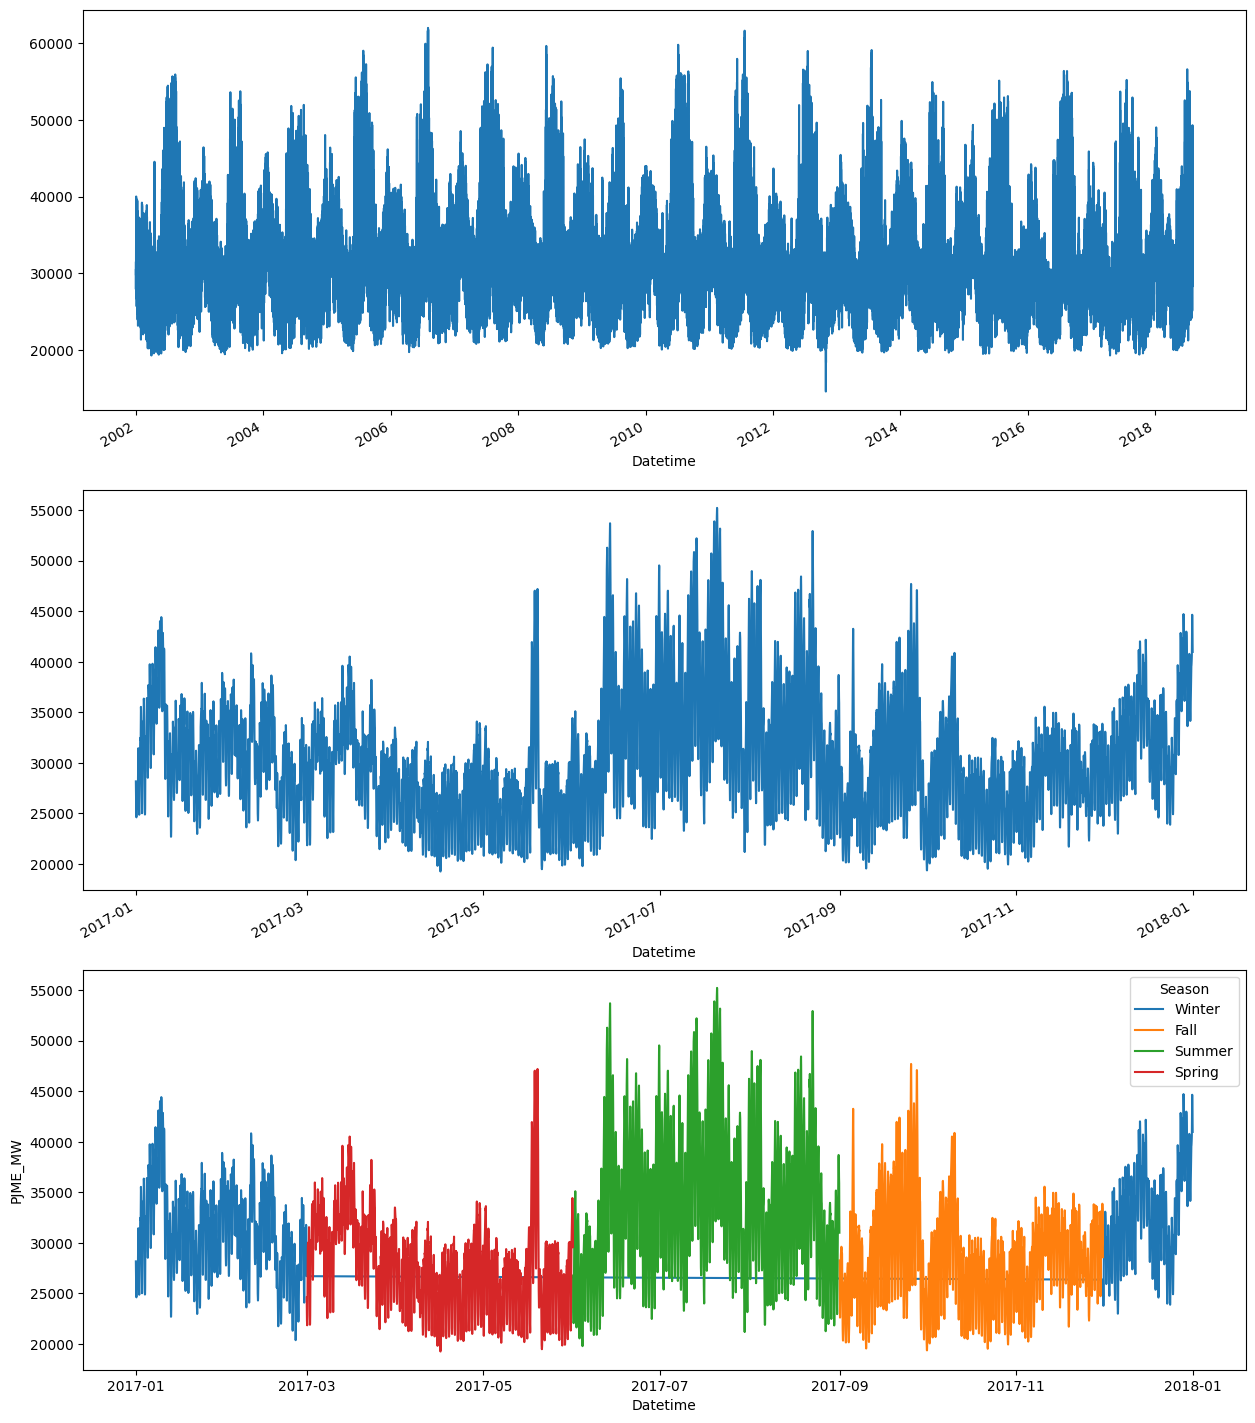

In [9]:
df_y = df.query("Year == 2017")
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15, 20))

df['PJME_MW'].plot(ax=ax1)

df_y['PJME_MW'].plot(ax=ax2)

sns.lineplot(data=df_y, x=df_y.index, y='PJME_MW', hue='Season', ax=ax3)

In [10]:
df_m = df.query("Month == 2 & Year == 2018")
df_w = df_m.head(24*7)
df_h = df.query("index >= '2018-02-01 00:00:00' & index <= '2018-02-01 23:00:00'")

<Axes: xlabel='Datetime'>

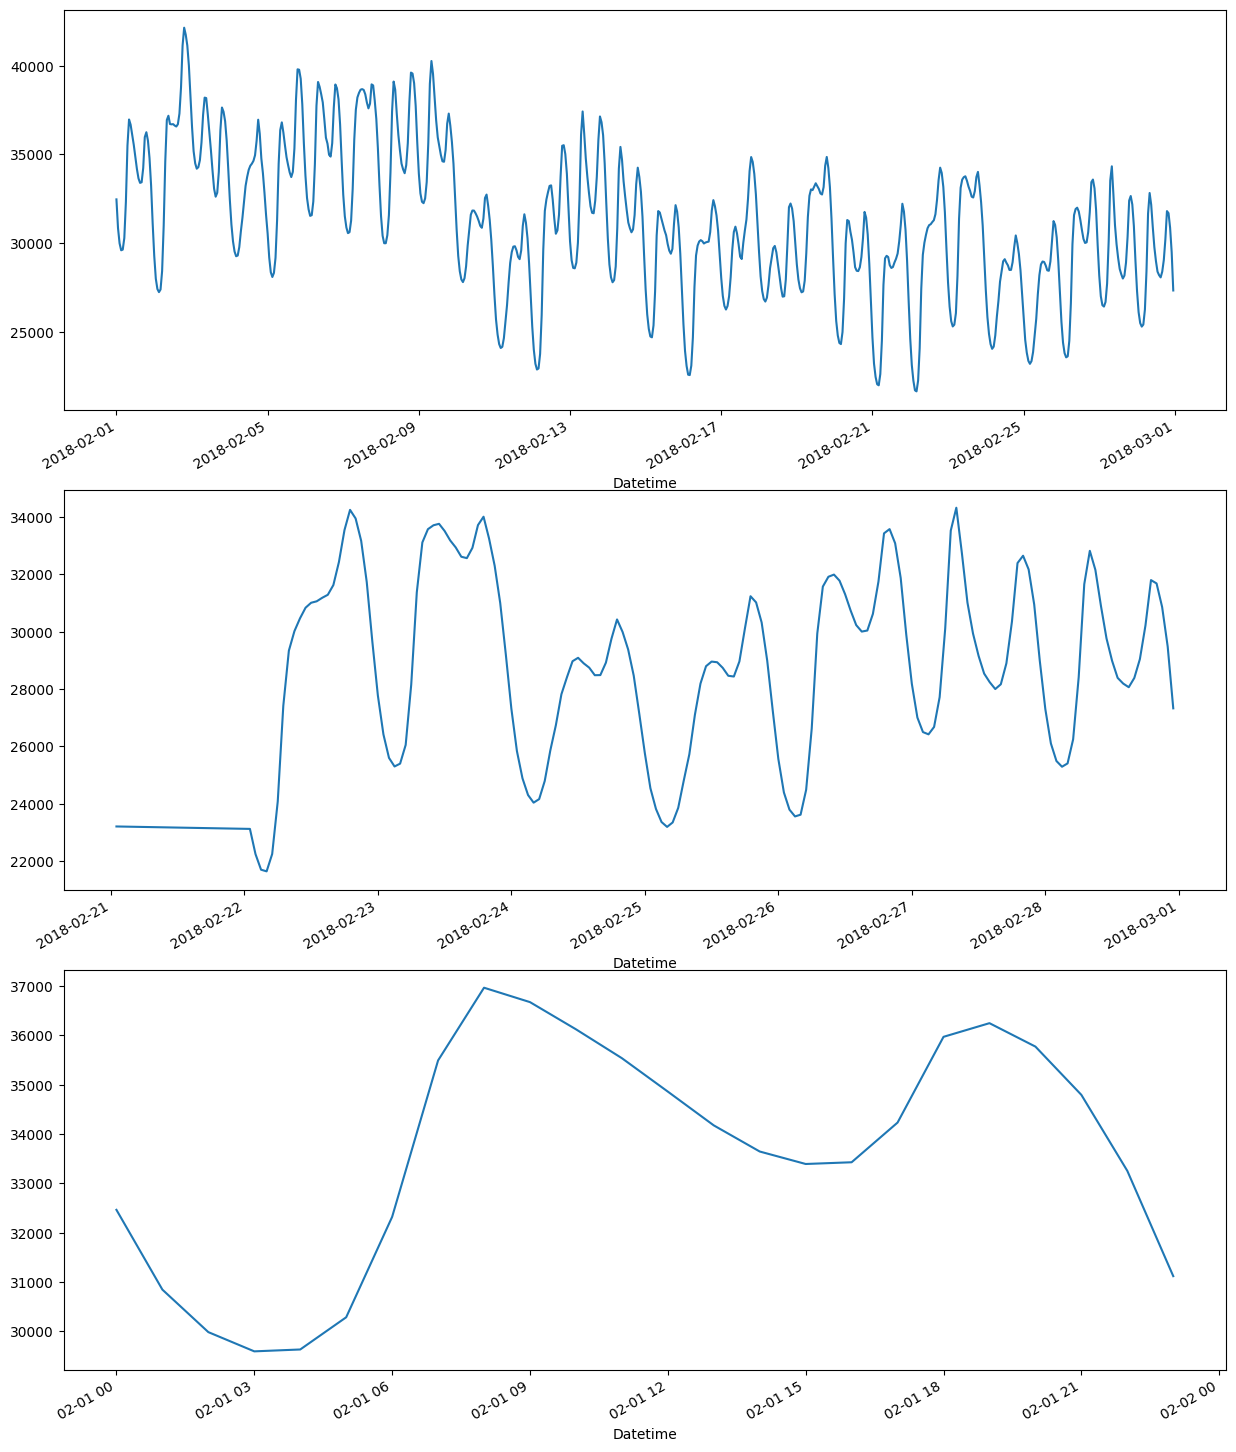

In [11]:
f, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,20))
df_m['PJME_MW'].plot(ax=ax1)
df_w['PJME_MW'].plot(ax=ax2)
df_h['PJME_MW'].plot(ax=ax3)

Text(0.5, 1.0, 'Distribution of Energy consumption overall during the labour week and the weekend')

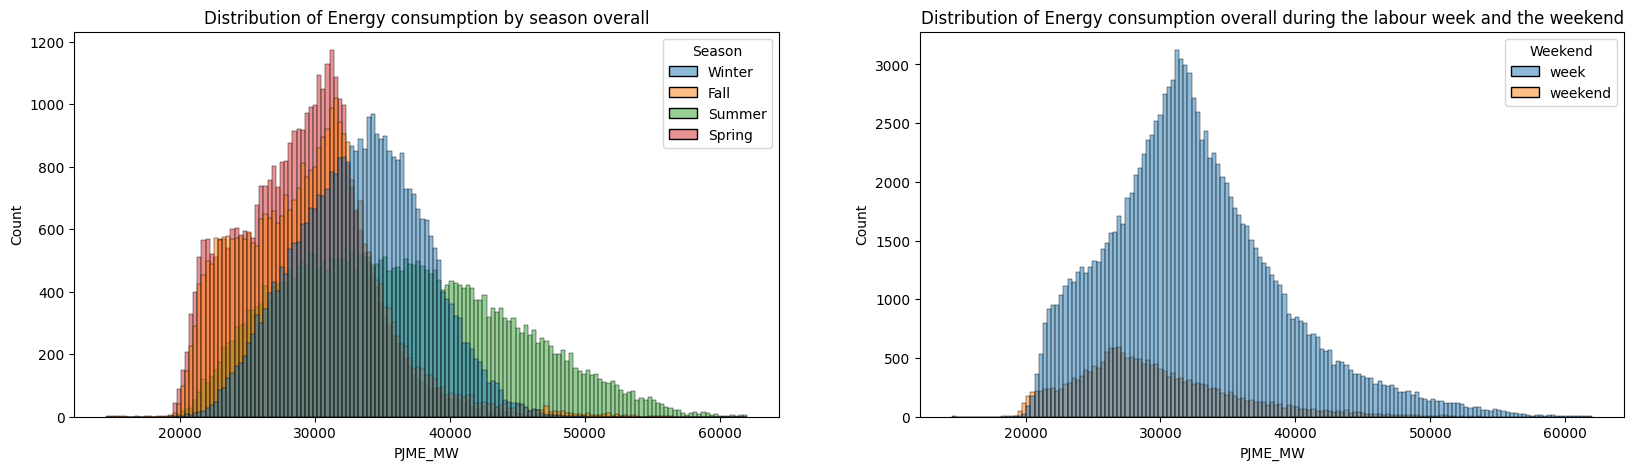

In [12]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
p1 = sns.histplot(data=df, x='PJME_MW', hue='Season', ax=ax1)
p1.set_title("Distribution of Energy consumption by season overall")
p2 = sns.histplot(data=df, x='PJME_MW', hue='Weekend', ax=ax2)
p2.set_title("Distribution of Energy consumption overall during the labour week and the weekend")

Text(0.5, 1.0, 'Energy consumption boxplot distribution (in MW) by Hour')

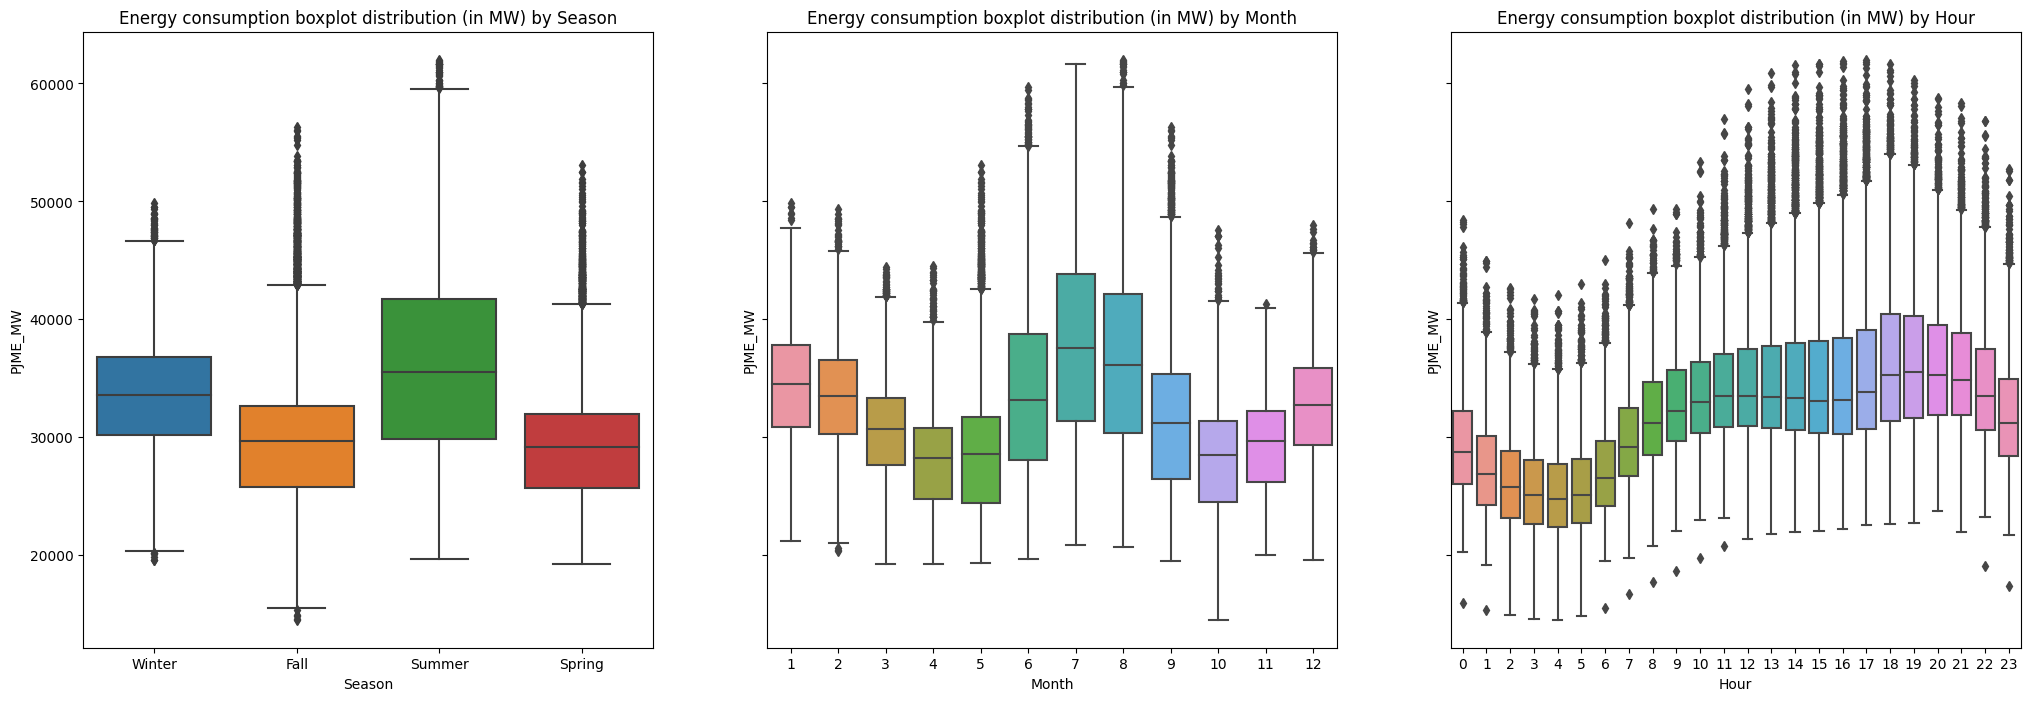

In [13]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(25,8), sharey=True)

p1 = sns.boxplot(data=df, x='Season', y='PJME_MW',ax=ax1)
p1.set_title("Energy consumption boxplot distribution (in MW) by Season")

p2 = sns.boxplot(data=df, x='Month', y='PJME_MW',ax=ax2)
p2.set_title("Energy consumption boxplot distribution (in MW) by Month")

p3 = sns.boxplot(data=df, x='Hour', y='PJME_MW', ax=ax3)
p3.set_title("Energy consumption boxplot distribution (in MW) by Hour")

In [14]:
df_weekend = df[['PJME_MW','Weekend']]
df_weekend.groupby('Weekend')['PJME_MW'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekend,,,,,,,,
week,124631.0,32524.159711,6463.856314,14544.0,28168.0,31825.0,36070.0,62009.0
weekend,20735.0,29411.869930,5787.269781,19247.0,25429.0,28445.0,32598.5,53933.0
